In [8]:
import layoutparser as lp
import cv2

In [9]:
image = cv2.imread("../data/0/0.jpg")
image = image[..., ::-1]

In [19]:
model = lp.AutoLayoutModel("lp://detectron2/PubLayNet/faster_rcnn_R_50_FPN_3x",
    extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
    label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})

In [20]:
layout = model.detect(image)
print(layout)

/usr/local/anaconda3/envs/cs492i/lib/python3.8/site-packages/detectron2/structures/image_list.py:101: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride


Layout(_blocks=[TextBlock(block=Rectangle(x_1=168.60067749023438, y_1=146.0117645263672, x_2=2368.39453125, y_2=1257.480224609375), text=None, id=None, type=Figure, parent=None, next=None, score=0.958397626876831)], page_data={})


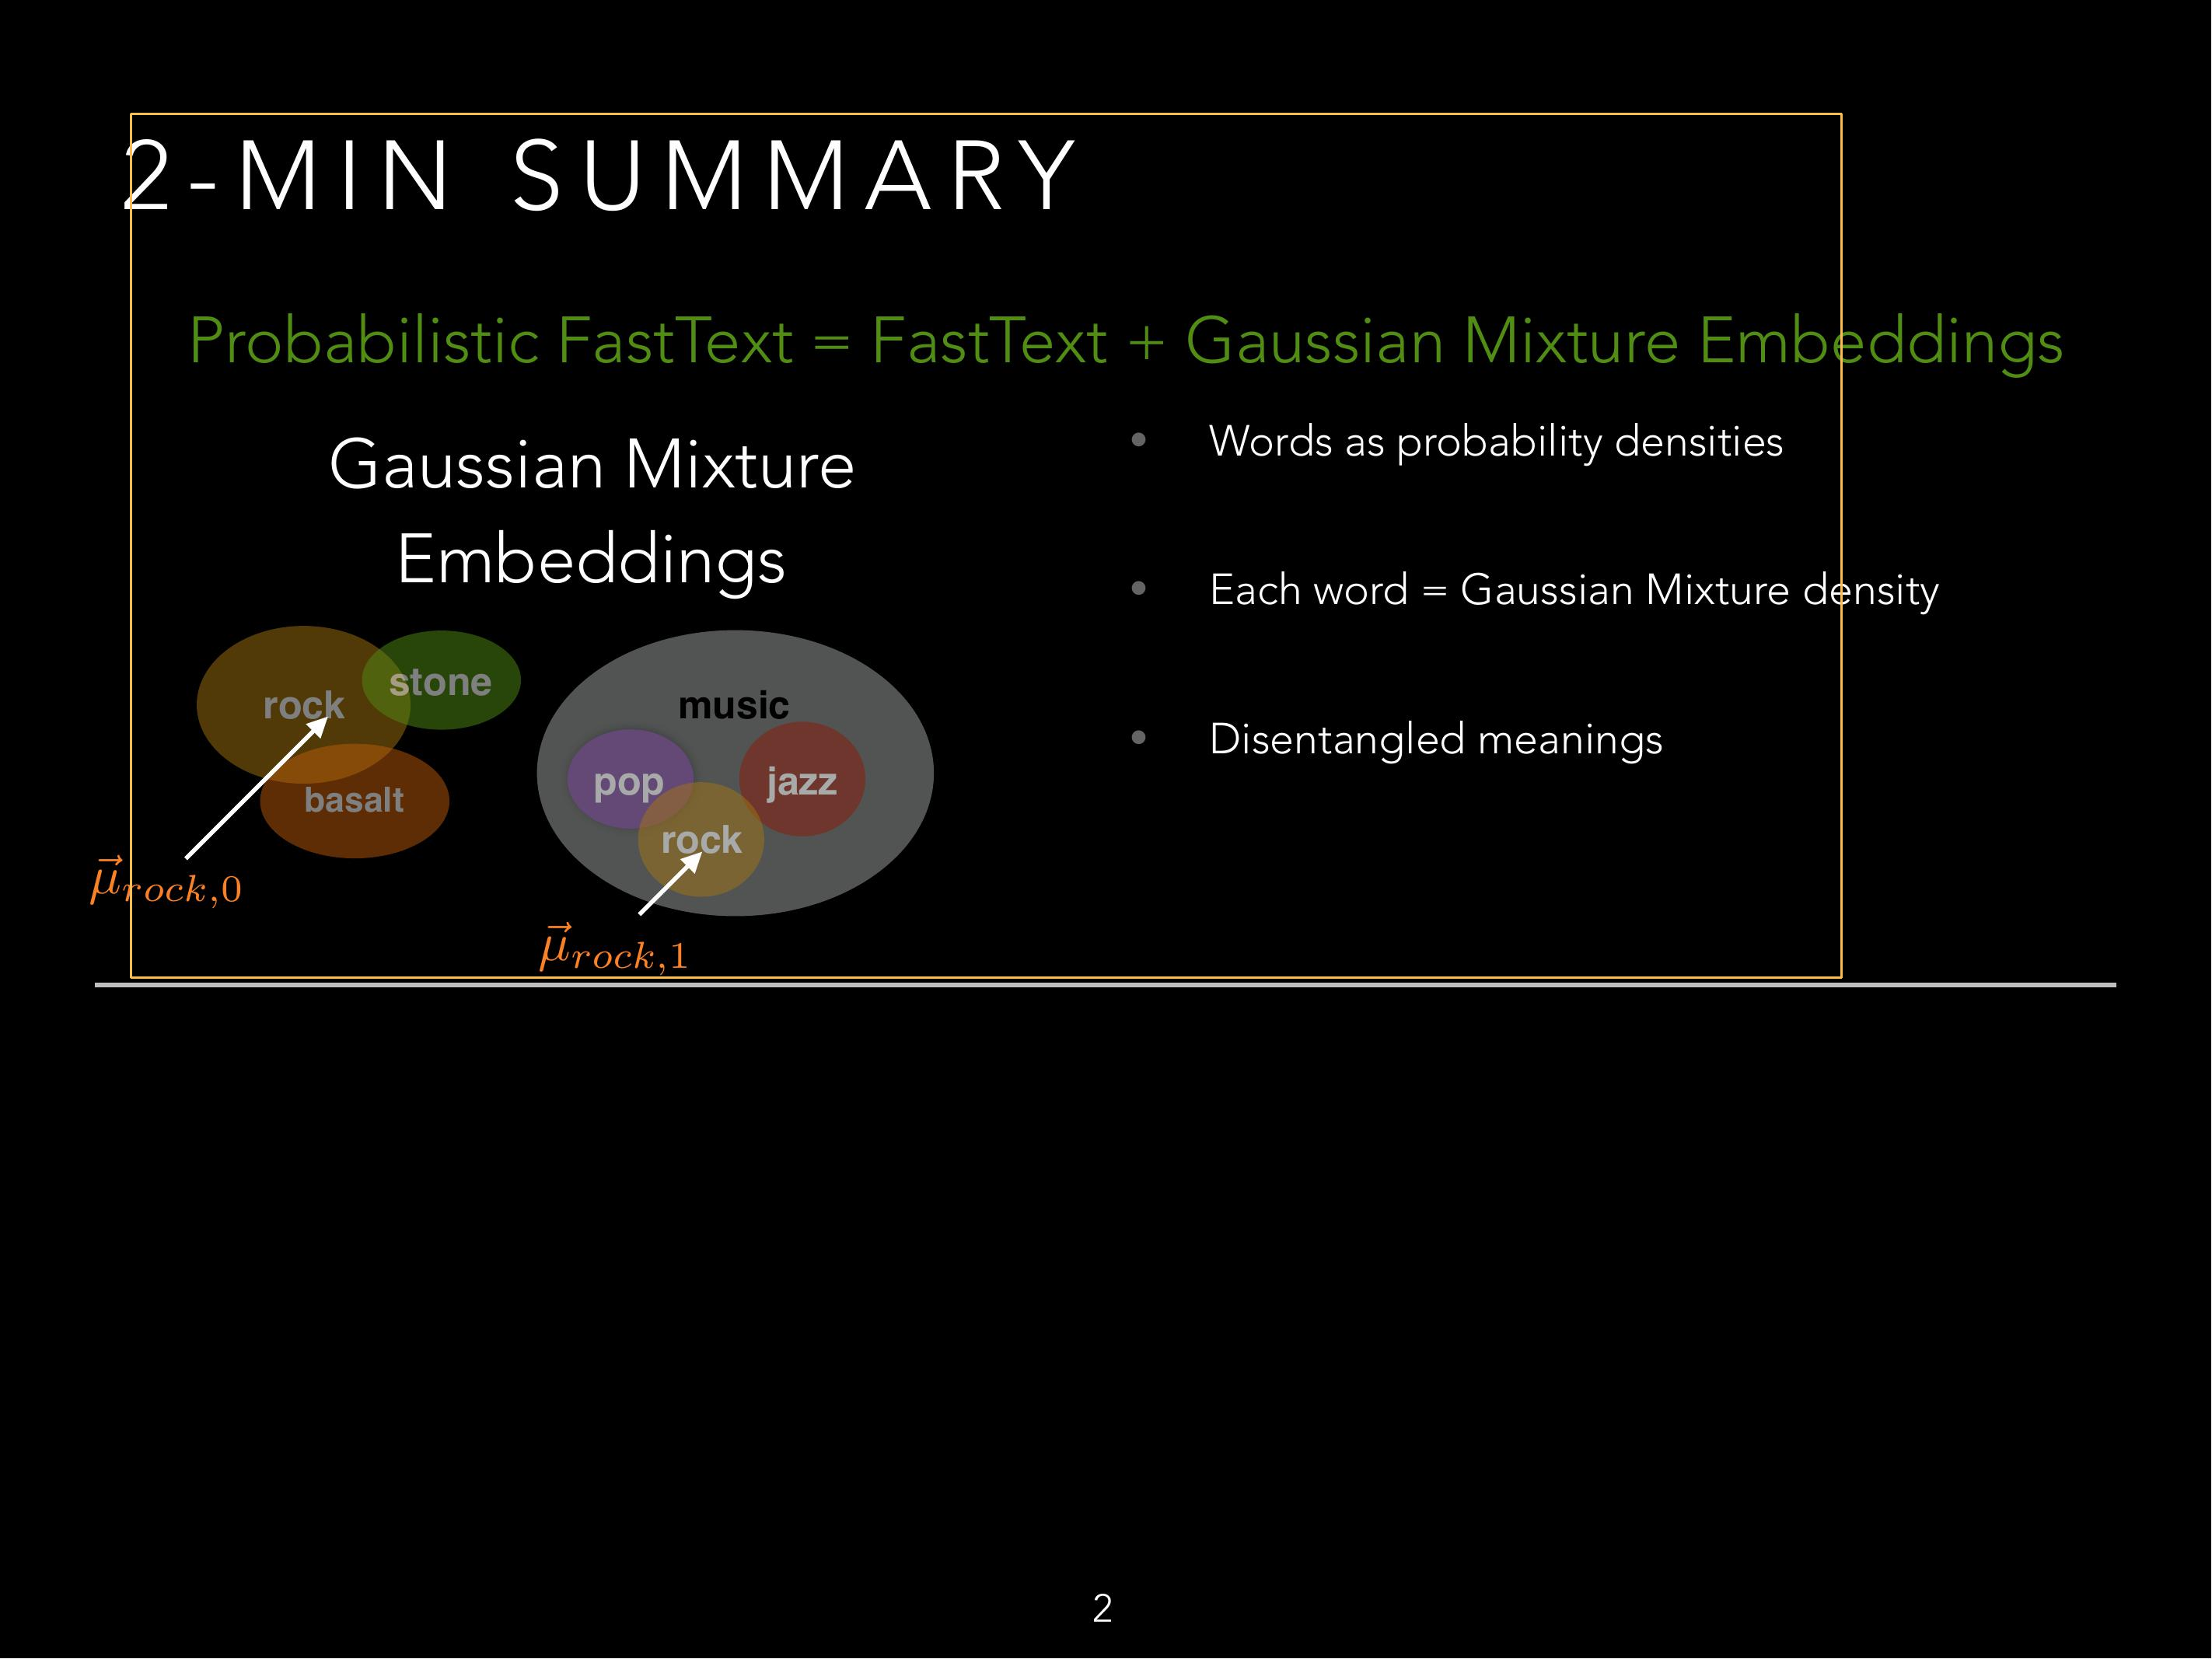

In [21]:
lp.draw_box(image, layout, box_width=3)

In [22]:
text_blocks = lp.Layout([b for b in layout if b.type=='Text'])
figure_blocks = lp.Layout([b for b in layout if b.type=='Figure'])

In [23]:
text_blocks = lp.Layout([b for b in text_blocks \
                   if not any(b.is_in(b_fig) for b_fig in figure_blocks)])

print(text_blocks, figure_blocks)

Layout(_blocks=[], page_data={}) Layout(_blocks=[TextBlock(block=Rectangle(x_1=168.60067749023438, y_1=146.0117645263672, x_2=2368.39453125, y_2=1257.480224609375), text=None, id=None, type=Figure, parent=None, next=None, score=0.958397626876831)], page_data={})


In [24]:
h, w = image.shape[:2]

left_interval = lp.Interval(0, w/2*1.05, axis='x').put_on_canvas(image)

left_blocks = text_blocks.filter_by(left_interval, center=True)
left_blocks.sort(key = lambda b:b.coordinates[1])

right_blocks = [b for b in text_blocks if b not in left_blocks]
right_blocks.sort(key = lambda b:b.coordinates[1])

text_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks + right_blocks)])

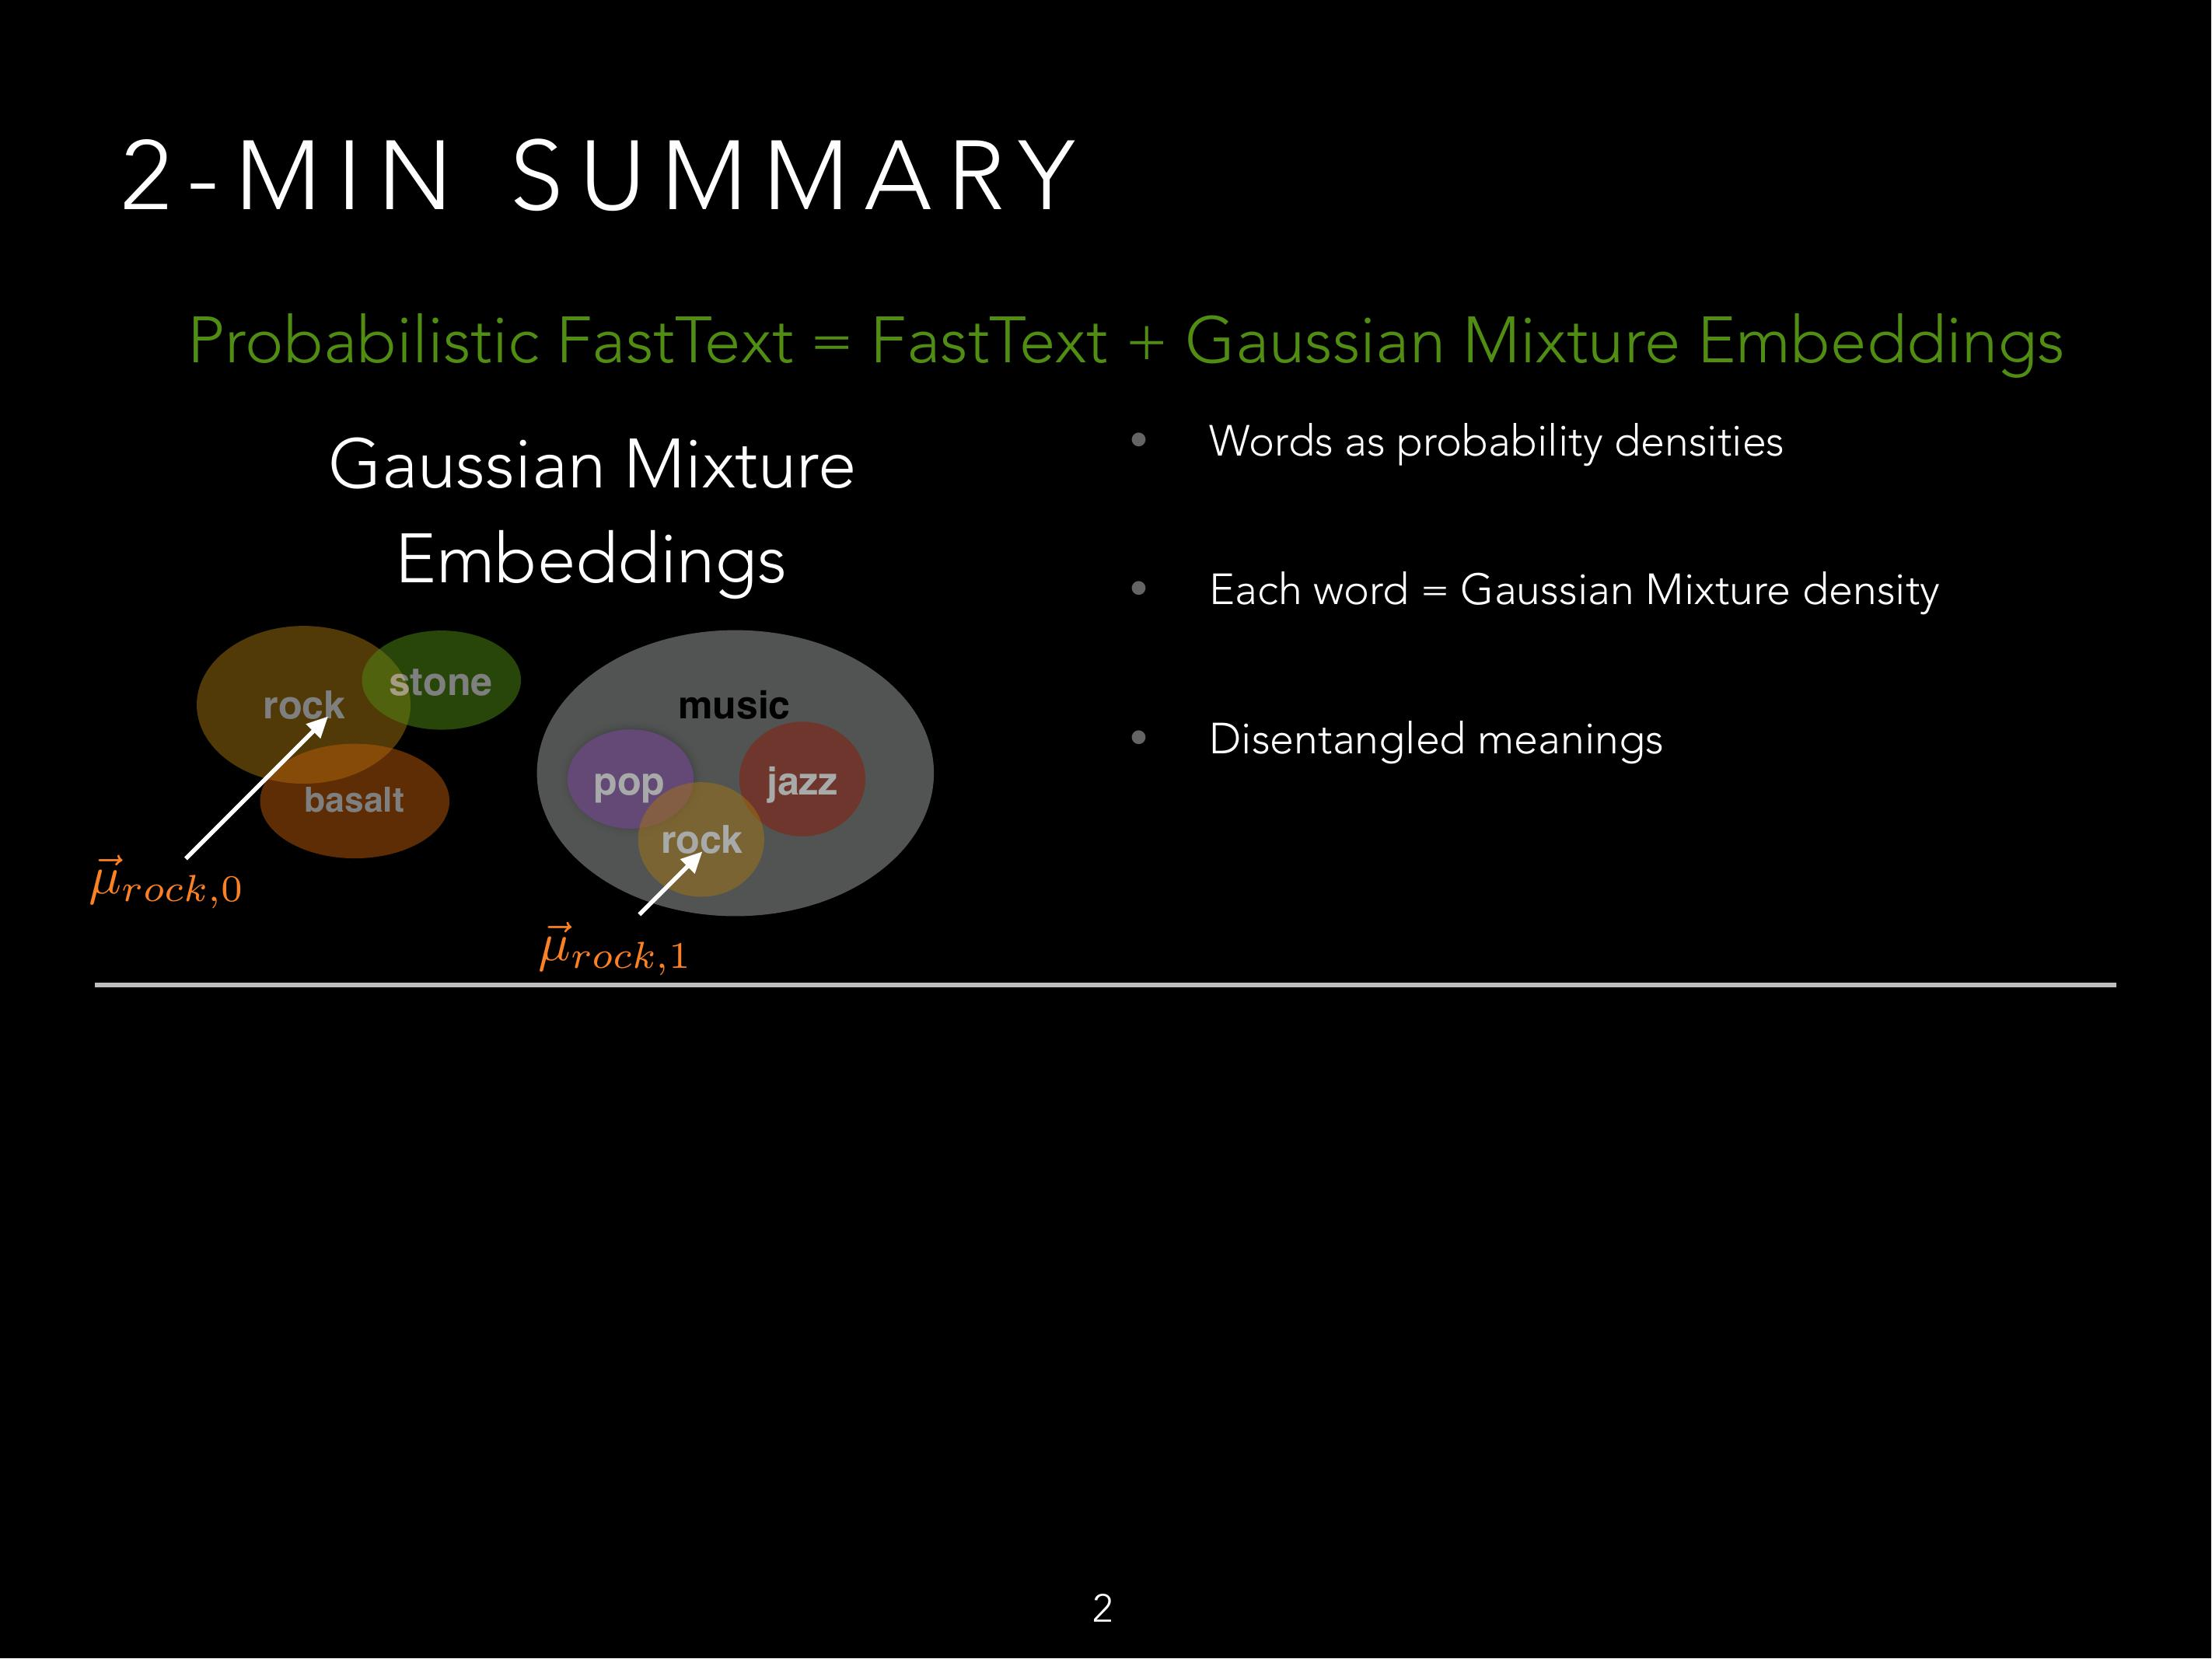

In [25]:
lp.draw_box(image, text_blocks,
            box_width=3, 
            show_element_id=True)